## Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium, wg którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
"mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza".
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R, G, B.
Zatem odległość między dwoma pikselami wyraża się wzorem:

\begin{equation}
    dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak, aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`,
    - Obliczanie kwadratów: `np.square`,
    - Obliczanie pierwiastka: `np.sqrt`,
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy, wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB.png_ oraz _lenaRGBSzum.png_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'
fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]

for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects = True)
        open(fileName, 'wb').write(r.content)

In [2]:
# zapisanie algorytmu w postaci funkcji
def RGB_median_filter(image, W):
    (X, Y, _) = image.shape
    output_image = np.zeros_like(image)

    for x in range(W // 2, X - W // 2):
        for y in range(W // 2, Y - W // 2):
            window = image[x - W // 2 : x + 1 + W // 2, y - W // 2 : y + 1 + W // 2]
            dRGB_matrix = np.zeros((W, W))
            
            for rowWin in range(W):
                for colWin in range(W):
                    diffs = window - window[rowWin, colWin]
                    squared_diffs = np.square(diffs)
                    dRGB_matrix[rowWin, colWin] = np.sqrt(squared_diffs.sum())
                    
            index = np.argmin(dRGB_matrix)
            median_value = window[np.unravel_index(index, (W, W))]
            output_image[x, y] = median_value
            
    return output_image

In [3]:
# wyświetlanie obrazu oryginalnego i przefiltrowanego
def show_original_filtered(original, filtered, orig_name):    
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)
    fig.suptitle("Wspólny wykres oryginalnego obrazka i obrazka po filtracji", fontsize = 15)
    
    axs[0].imshow(original, vmin = 0, vmax = 255)
    axs[0].set_title(f"Oryginalny obrazek {orig_name}")
    axs[0].axis('off')
    
    axs[1].imshow(filtered, vmin = 0, vmax = 255)
    axs[1].set_title(f"Obrazek {orig_name} po filtracji")
    axs[1].axis('off')

In [4]:
lenaRGB = cv2.imread('lenaRGB.png') 
lenaRGB = cv2.cvtColor(lenaRGB, cv2.COLOR_BGR2RGB)

lenaRGBSzum = cv2.imread('lenaRGBSzum.png') 
lenaRGBSzum = cv2.cvtColor(lenaRGBSzum, cv2.COLOR_BGR2RGB)

### Eksperymenty dla rozmiaru okna `W=5`

In [5]:
# rozmiar okna
W = 5

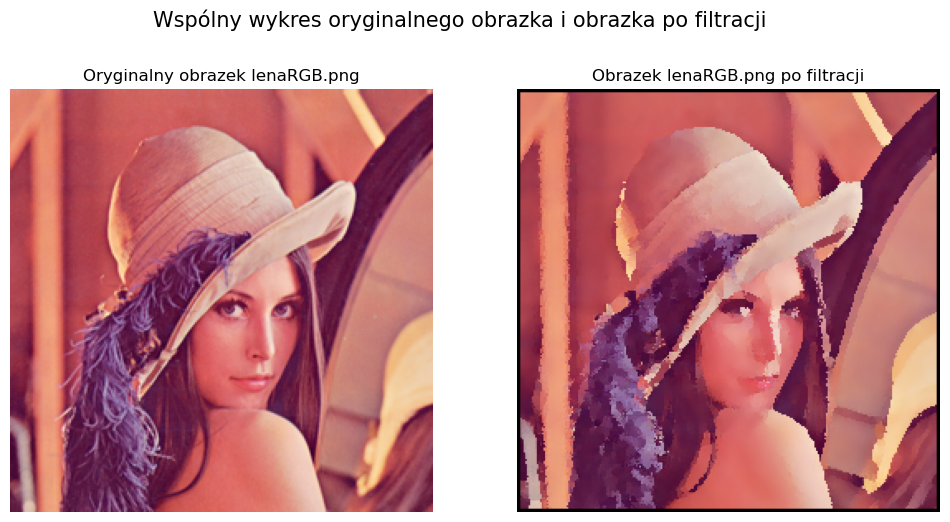

In [6]:
lenaRGB_filtered = RGB_median_filter(lenaRGB, W)
show_original_filtered(lenaRGB, lenaRGB_filtered, "lenaRGB.png")

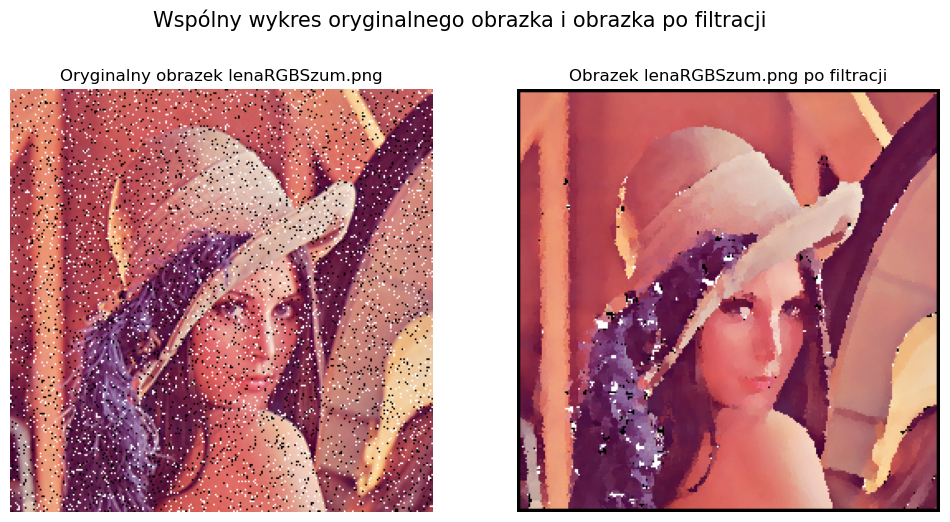

In [7]:
lenaRGBSzum_filtered = RGB_median_filter(lenaRGBSzum, W)
show_original_filtered(lenaRGBSzum, lenaRGBSzum_filtered, "lenaRGBSzum.png")

### Eksperymenty dla rozmiaru okna `W=9`

In [8]:
# rozmiar okna
W = 9

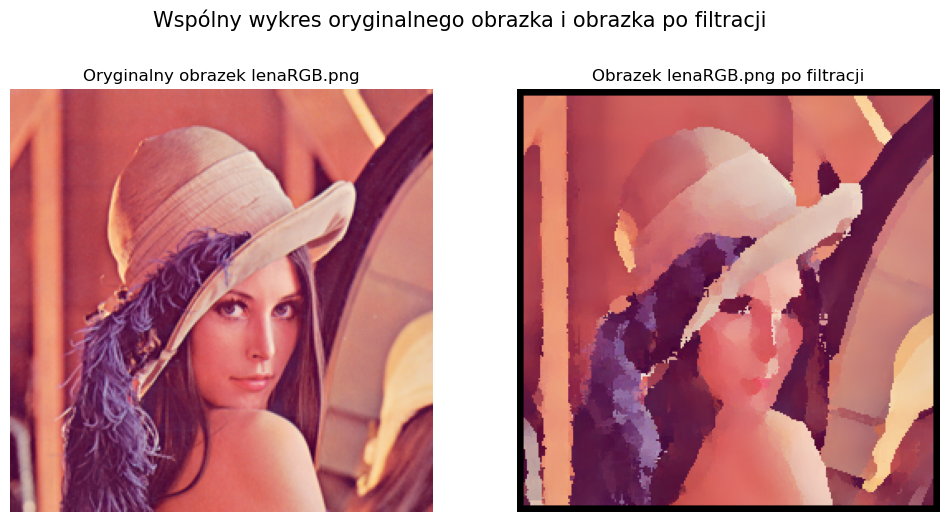

In [9]:
lenaRGB_filtered = RGB_median_filter(lenaRGB, W)
show_original_filtered(lenaRGB, lenaRGB_filtered, "lenaRGB.png")

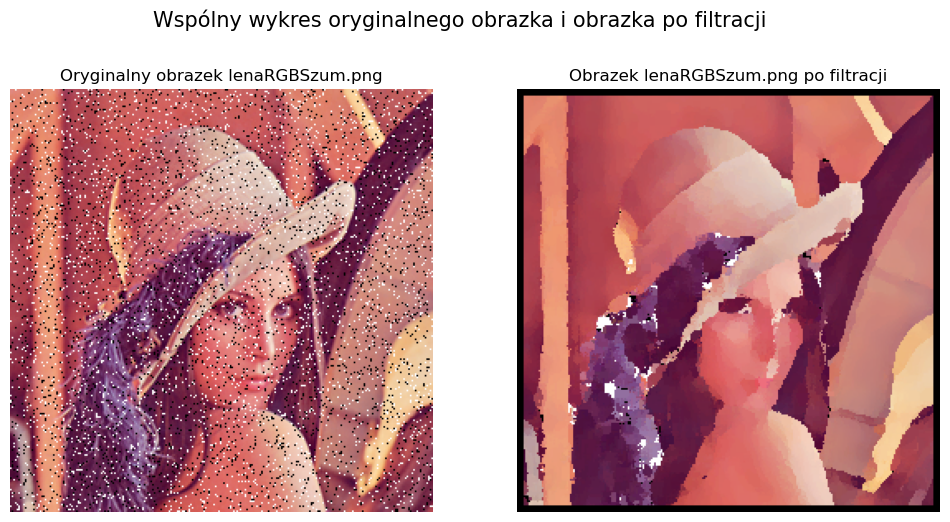

In [10]:
lenaRGBSzum_filtered = RGB_median_filter(lenaRGBSzum, W)
show_original_filtered(lenaRGBSzum, lenaRGBSzum_filtered, "lenaRGBSzum.png")